In [90]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import pandas_ta as pda
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [91]:
#pairList = pairJson['ftxBnbPair']
pairList = pairJson['ftxClassicPair']
# pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 22202 candles for BTCUSD
Successfully load 20876 candles for ETHUSD
Successfully load 19082 candles for BNBUSD
Successfully load 16625 candles for LTCUSD
Successfully load 9205 candles for DOGEUSD
Successfully load 13468 candles for XRPUSD
Successfully load 13289 candles for SOLUSD
Successfully load 6388 candles for SHIBUSD
Successfully load 15615 candles for LINKUSD
Successfully load 12038 candles for UNIUSD
Successfully load 10755 candles for MATICUSD
Successfully load 7207 candles for AXSUSD
Successfully load 7519 candles for CROUSD
Successfully load 22011 candles for FTTUSD
Successfully load 15462 candles for TRXUSD
Successfully load 16625 candles for BCHUSD
Successfully load 8221 candles for FTMUSD
Successfully load 9805 candles for GRTUSD
Successfully load 11439 candles for AAVEUSD
Successfully load 10755 candles for OMGUSD
Successfully load 7832 candles for LRCUSD
Successfully load 12428 candles for SUSHIUSD
Successfully load 3367 candles for MANAUSD
Successful

,open,high,low,close,volume
timestamp,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01
...,...,...,...,...,...
2022-01-31 12:00:00,37290.0,37430.0,36840.0,37092.0,1.866491e+07
2022-01-31 13:00:00,37092.0,37372.0,36798.0,37278.0,1.785065e+07
2022-01-31 14:00:00,37278.0,37545.0,37199.0,37536.0,3.469849e+07


In [92]:
# -- Indicator variable --
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), axis=1, inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=3) # original 7, Fibo 5
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=13) # original 30, Fibo 13
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=34) # original 50, Fibo 34
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=89) # original 100, Fibo 89
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=233) # original 121, Fibo 233
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=610) # original 200, Fibo 610

    df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
    df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
    df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
    df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])

    #Super Trend
    ST_length = 10
    ST_multiplier = 3.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    #Super Trend 1
    ST_length = 10
    ST_multiplier = 1.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_1'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 2
    ST_length = 11
    ST_multiplier = 2.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_2'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 3
    ST_length = 12
    ST_multiplier = 3.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_3'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    # df['ADX']=ta.trend.adx(high=df['high'], low=df['low'], close=df['close'], window=14)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)
    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,...,SUPER_TREND,SUPER_TREND_DIRECTION,SUPER_TREND_1,SUPER_TREND_DIRECTION_1,SUPER_TREND_2,SUPER_TREND_DIRECTION_2,SUPER_TREND_3,SUPER_TREND_DIRECTION_3,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000,1,0.000000,1,0.000000,1,0.000000,1,NaN,NaN
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00,10464.500000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00,10421.250000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01,10425.125000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 12:00:00,37290.0,37430.0,36840.0,37092.0,1.866491e+07,37177.146045,37227.357874,37448.200665,37429.029661,37719.010130,...,37903.310294,-1,37002.716280,1,37560.829921,-1,37906.132957,-1,0.513461,-72.648515
2022-01-31 13:00:00,37092.0,37372.0,36798.0,37278.0,1.785065e+07,37227.573023,37234.592463,37438.474913,37425.673446,37715.240813,...,37903.310294,-1,37002.716280,1,37560.829921,-1,37906.132957,-1,1.000000,-52.424242
2022-01-31 14:00:00,37278.0,37545.0,37199.0,37536.0,3.469849e+07,37381.786511,37277.650683,37444.047775,37428.125148,37713.708840,...,37903.310294,-1,37027.957651,1,37560.829921,-1,37906.132957,-1,1.000000,-1.005587


In [93]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-01-01':])

# -- Starting value --
startingBalance = 100
makerFee = 0.0002
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False
extremeFear = False

# -- Hyper parameters --
stochOverBought = 0.90 # 0.8 default
stochOverSold = 0.10 # 0.2 default
SlPct = 0.04 # 0.015 default
TpPct = 0.10 # 0.15 default
willOverSold = -95 # -80 to -100 means OverSold
willOverBought = -5 # 0 to -20 means OverBought
maxPositions = 3 # best results with 3 open positions max

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if extremeFear:
        if (
            row['EMA1'] > row['EMA2']
            and row['EMA2'] > row['EMA3']
            and row['EMA3'] > row['EMA4']
            and row['EMA4'] > row['EMA5']
            and row['EMA5'] > row['EMA6']
            # row['SUPER_TREND_DIRECTION'] == 1 # greed
            and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
            and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
            and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
            # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
            # and row['SSA'] > row['SSB']
            and row['close'] > row['KIJUN']
            # and row['close'] > row['TENKAN']
            # and row['ADX'] > 25
            and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
        else:
            return False
    else:
        if (
            row['EMA1'] > row['EMA2']
            and row['EMA2'] > row['EMA3']
            and row['EMA3'] > row['EMA4']
            and row['EMA4'] > row['EMA5']
            and row['EMA5'] > row['EMA6']
            and row['SUPER_TREND_DIRECTION'] == 1 # greed
            # and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
            # and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
            # and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
            # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
            # and row['SSA'] > row['SSB']
            and row['close'] > row['KIJUN']
            # and row['close'] > row['TENKAN']
            # and row['ADX'] > 25
            # and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
        else:
            return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    # if row['EMA2'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Original bglacial
    # if row['EMA6'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Cf. post Pahmoy
    if (
        row['EMA1'] < row['EMA2']
        and (row['STOCH_RSI'] > stochOverSold and row['WillR'] > willOverSold)
    ): # JCO
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", round((sum(walletUsdArray) + usd), 2), "$")

Final wallet 215622.96 $


In [94]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2021-01-01 00:00:00] -> [2022-01-31 16:00:00]
Starting balance : 99.98 $

----- General Informations -----
Final balance : 215622.96 $
Performance vs US Dollar : 215573.29 %
Bitcoin Buy and Hold Performence : 30.09 %
Performance vs Buy and Hold : 165693.24 %
Best trade : +71.99 %, the 2021-10-07 19:00:00
Worst trade : -7.69 %, the 2021-04-18 05:00:00
Worst drawDown : - 30.17 %
Total fees :  18333.23 $

----- Trades Informations -----
Total trades on period : 933
Number of positive trades : 395
Number of negative trades :  538
Trades win rate ratio : 42.34 %
Average trades performance : 0.96 %
Average positive trades : 3.69 %
Average negative trades : -1.04 %

----- Trades Reasons -----
Buy Market Order     933
Sell Market Order    933
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Wors

In [95]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-01-16 00:00:00,2022-01-16 00:00:00,FTM/USD,Buy,Buy Market Order,3.02345,50.088906,71530.535498,23658.580594,215006.530718,NaN,NaN,,253533.954161,38527.423444,0.151962
2022-01-16 03:00:00,2022-01-16 03:00:00,FTT/USD,Sell,Sell Market Order,45.54900,50.243793,143257.139105,0.000000,214787.674602,-218.856116,-0.101790,Bad,253533.954161,38746.279559,0.152825
2022-01-17 04:00:00,2022-01-17 04:00:00,FTM/USD,Sell,Sell Market Order,3.14915,52.153093,217709.405090,0.000000,217709.405090,2921.730487,1.360288,Good,253533.954161,35824.549072,0.141301
2022-01-19 14:00:00,2022-01-19 14:00:00,FTT/USD,Buy,Buy Market Order,46.93800,50.798861,145105.737486,1545.717089,217658.606228,NaN,NaN,,253533.954161,35875.347933,0.141501
2022-01-21 00:00:00,2022-01-21 00:00:00,FTT/USD,Sell,Sell Market Order,45.65300,49.396636,215622.963133,0.000000,215622.963133,-2035.643095,-0.935246,Bad,253533.954161,37910.991029,0.149530


----- 2021 Performances: 213961.82% -----


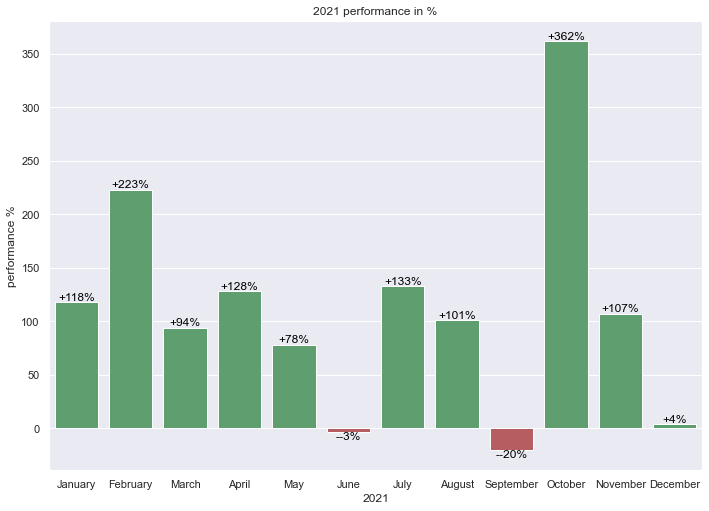

ValueError: Could not interpret input 'date'

In [96]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


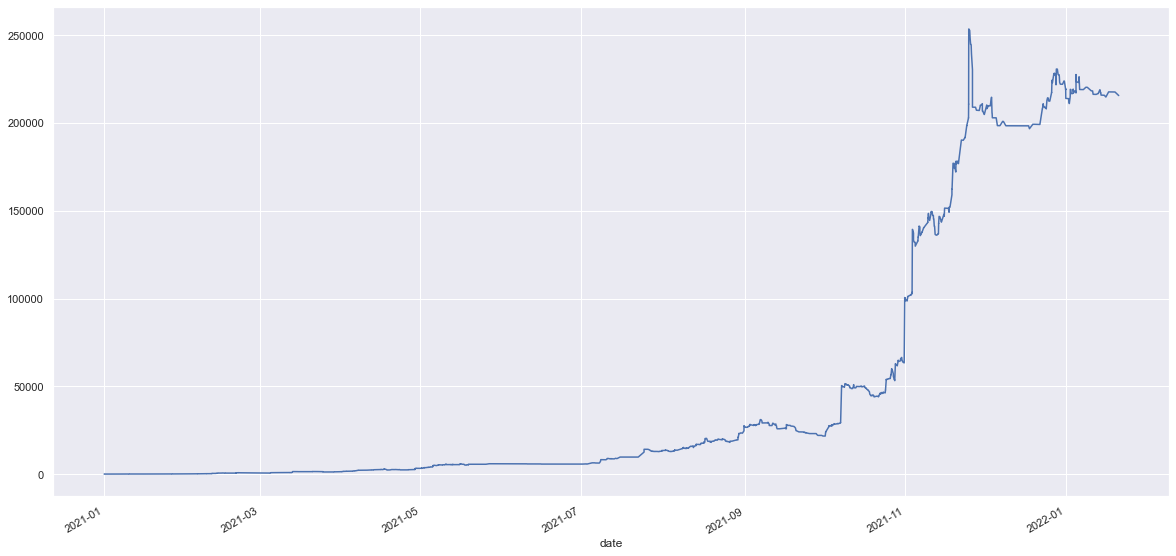

In [97]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2020':])

In [98]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1856,2022-01-14 05:00:00,FTM/USD,Buy,Buy Market Order,3.02085,50.702983,144831.864338,23972.038390,217247.796507
1857,2022-01-14 07:00:00,FTM/USD,Sell,Sell Market Order,2.96615,49.773263,215886.752744,0.000000,215886.752744
1858,2022-01-15 13:00:00,FTT/USD,Buy,Buy Market Order,45.65600,50.373576,143890.919446,1575.816097,215836.379168
1859,2022-01-15 13:00:00,CRV/USD,Buy,Buy Market Order,5.40305,50.361822,71920.278812,13311.051871,215786.017347
1860,2022-01-16 00:00:00,CRV/USD,Sell,Sell Market Order,5.35200,49.868525,143111.159901,0.000000,215056.619624
1861,2022-01-16 00:00:00,FTM/USD,Buy,Buy Market Order,3.02345,50.088906,71530.535498,23658.580594,215006.530718
1862,2022-01-16 03:00:00,FTT/USD,Sell,Sell Market Order,45.54900,50.243793,143257.139105,0.000000,214787.674602
1863,2022-01-17 04:00:00,FTM/USD,Sell,Sell Market Order,3.14915,52.153093,217709.405090,0.000000,217709.405090
1864,2022-01-19 14:00:00,FTT/USD,Buy,Buy Market Order,46.93800,50.798861,145105.737486,1545.717089,217658.606228
1865,2022-01-21 00:00:00,FTT/USD,Sell,Sell Market Order,45.65300,49.396636,215622.963133,0.000000,215622.963133
